# Importing the libraries 

In [48]:
#Importing the libraries 
import cv2
import numpy as np

# Using HAAR face Classifier for capturing images 

In [49]:
# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
# Cascade classifiers that were used in the first real-time face detector.


# A Haar classifier, or a Haar cascade classifier, is a machine learning object detection program that 
#identifies objects in an image and video.


# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face



<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ACER ES1 512\AppData\Local\Temp\ipykernel_9396\4176180834.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


## Collecting the sample images of the user - for test we are taking 10 images , for more precise prediction you can take more sample images on real-time with different environment


In [50]:
# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        # Create a folder of desired will and set the save path 
        file_name_path = './ani_photo/' + "aniket" +str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 10: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")
cap.release()

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found


In [51]:
from os import listdir
from os.path import isfile, join

In [52]:

# Get the training data we previously made

data_path = './ani_photo/'
img_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

# Create arrays for training data and labels
train_images , Labels = [], []

# Open training images in our datapath
# Create a numpy array for training data
for i, files in enumerate(img_files):
    image_path = data_path + img_files[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    train_images.append(np.asarray(images, dtype=np.uint8))
    Labels.append(i)

# Create a numpy array for both training data and labels
Labels = np.asarray(Labels, dtype=np.int32)


face_model  = cv2.face.LBPHFaceRecognizer_create()

# Let's train our model 
face_model.train(np.asarray(train_images), np.asarray(Labels))
print("Model trained sucessefully")

Model trained sucessefully


# Saving and using the model - face_model

In [53]:
face_model.save("Real_time_face_detector")

In [54]:
face_model.read("Real_time_face_detector")

In [55]:

# Creating a real time detector with bounding rectangle and cropped image 
def face_detector(img, size=0.5):
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img, []
    
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi




<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ACER ES1 512\AppData\Local\Temp\ipykernel_9396\1173781915.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Real Time Detection 

In [67]:
import time
# Optional step -- for creating a pause when the image is detected 

cap = cv2.VideoCapture(0)


while True:

    ret, frame = cap.read()
    
    image, face = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Pass face to prediction model
        # "results" comprises of a tuple containing the label and the confidence value
        results = face_model.predict(face)
        # harry_model.predict(face)
        
        if results[1] < 500:
            confidence = int( 100 * (1 - (results[1])/400) )
            display_string = str(confidence) + '% Confident it is User'
            
        cv2.putText(image, display_string, (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255,120,150), 2)
        
        if confidence > 85:
            cv2.putText(image, "Hey Aniket", (150, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
            time.sleep(5)
            path_img = './ani_photo/' + "aniket_final" + '.jpg'
            cv2.imwrite(path_img , image)
            cv2.imshow('Face Recognition', image )
            os.system("start chrome https://www.instagram.com/_aniket_kalta/")
            break
            
        else:
            
            cv2.putText(image, "I do not recongize you.", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image )

    except:
        cv2.putText(image, "No Face Found", (220, 120) , cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "looking for face", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        pass
        
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()     

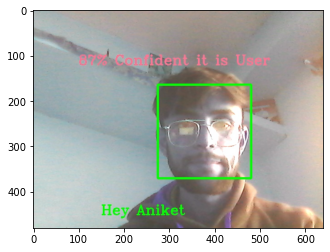

In [68]:
import matplotlib.pyplot as plt 
%matplotlib inline

final_img  = cv2.imread(path_img)
final_img

#plt.imshow( cv2.cvtColor( np.squeeze(final_img , cv2.COLOR_BGR2RGB ))
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
